<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>


# PRE HOMEWORK

# Case 3: Fifa 2022 world cup

<a target="_blank" href="https://colab.research.google.com/github/DACSS-CSSmeths/Networks_intro/blob/main/case3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Let me use some information about countries from the 2022 [Fifa World Cup](https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads). I have added som attributes for the countrues and the clubs with the help from ChatGpt (these attributes may not be accurate).

* For the _club_: if the club was the national champion in its country the year before the world cup
* For the _country_: if the country  is considered developed or not.

In [24]:
from IPython.display import IFrame

IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjk__2p0MTF5Oh_qmJ9PQpk-QN71HXKzxIYBcvKe09YiGYDD9tL1FlZ7BIiAL2rx_4wdF8mOWziGl9/pubhtml', 800, 350)

Let's use the data from GitHub:

In [25]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


This shows data for every player in the cup. Let's pay attention to three variables:

In [26]:
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Pay attention! ... it is obvious we could have a _bipartite_ network here.

Let's try this one with players and club:

In [27]:
import networkx as nx

fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [28]:
# from networkx.algorithms import bipartite


# players_nodes,clubs_nodes = bipartite.sets(fifanet1)
# # Draw bipartite graph
# pos = nx.bipartite_layout(fifanet1, players_nodes,align='horizontal',aspect_ratio=1)
# color_dict = {0:'b',1:'r'}
# color_list = [color_dict[i[1]] for i in fifanet.nodes.data('bipartite')]
# nx.draw(fifanet1, pos=pos, with_labels=True, node_color = color_list)

As you see, here you have a problem with the code
```
players_nodes,clubs_nodes = bipartite.sets(fifanet1)
```

That is bad news. Let me show you an alternative way to that line of code:

In [29]:
# players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
# clubs_nodes = set(fifanet1) - players_nodes

Now, draw the graph:

In [30]:
# pos = nx.spring_layout(fifanet1)
# color_dict = {0:'b',1:'r'}
# color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
# nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

As you may have guessed, the clubs divide the players, so in the data we have, it is NOT possible that a player belongs to two clubs. In our example above, an actor can be in more than one movie. If you install pydot you could see this graph:

In [31]:
# pos = nx.nx_pydot.graphviz_layout(fifanet1)
# nx.draw(fifanet1, pos=pos, with_labels=False, node_size=10, node_color = color_list,width=0.5)

As this one is not working, do you think "player-country"  would work?
Prepare it, and test your answer.

Prepare the bipartite "club-country", and create two graphs, one where club is projected, and another where country is projected. What is the meaning of the edges in each case?

Save both projected graphs (weighted) as _graphml_. Include the attributes for the nodes that will be projected.

__________

Go back to the [INTRO](https://dacss-cssmeths.github.io/Networks_intro/)

In [32]:
# prepare the new bipartite graph
fifanet2 = nx.Graph()
fifanet2.add_nodes_from(fifa.club, bipartite=0) # club
fifanet2.add_nodes_from(fifa.nationality, bipartite=1) # country (coded as nationality in the fifa2022 dataset)

# build edges based on player-club-country relations
club_country_edges = []
for index, row in fifa.iterrows():
    club_country_edges.append((row['club'], row['nationality']))
fifanet2.add_edges_from(club_country_edges)

In [33]:
# get the nodes sets
club_nodes = {n for n, d in fifanet2.nodes(data=True) if d["bipartite"] == 0}
country_nodes = set(fifanet2) - club_nodes

# club

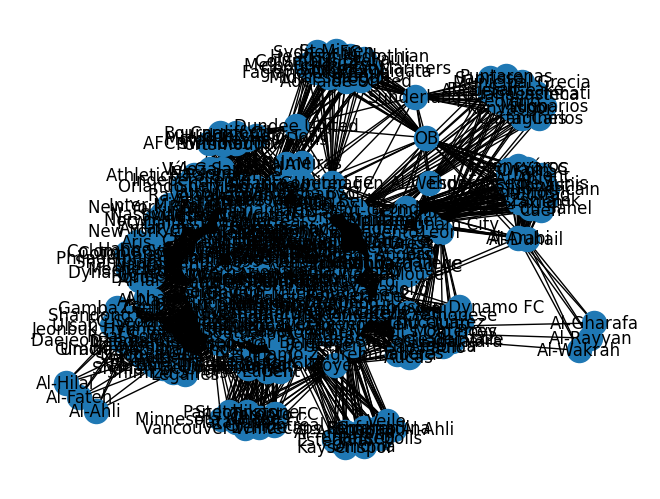

In [34]:
from networkx.algorithms import bipartite

# project the graph onto the club nodes
club_projected = bipartite.weighted_projected_graph(fifanet2, club_nodes)
nx.draw(club_projected, with_labels = True)

## adding club attributes

In [36]:
# get club attributes
attr_club=pd.read_excel(fifaLink,sheet_name='attributes_club')
attr_club

,club,winnerCountry
0,1. FC Köln,0
1,1899 Hoffenheim,0
2,Abha,0
3,Adelaide United,0
4,AEK Athens,0
...,...,...
290,Wolverhampton Wanderers,0
291,Wydad AC,1
292,Young Boys,0
293,Zamalek,0


In [37]:
# dictionary for attributes
attrDic_club={n:s for n,s in zip(attr_club.club,attr_club.winnerCountry)}
nx.set_node_attributes(club_projected,attrDic_club , "winnerCountry")

In [47]:
# you can see them now:
# club_projected.nodes.data()

# club_projected.edges.data()

EdgeDataView([('Sampdoria', 'Wydad AC', {'weight': 2}), ('Sampdoria', 'Almería', {'weight': 2}), ('Sampdoria', 'Porto', {'weight': 2}), ('Sampdoria', 'Burnley', {'weight': 2}), ('Sampdoria', 'Al-Ittihad', {'weight': 2}), ('Sampdoria', 'West Ham United', {'weight': 2}), ('Sampdoria', 'Hellas Verona', {'weight': 2}), ('Sampdoria', 'Birmingham City', {'weight': 2}), ('Sampdoria', 'Brest', {'weight': 2}), ('Sampdoria', 'Roma', {'weight': 2}), ('Sampdoria', 'Osasuna', {'weight': 2}), ('Sampdoria', 'Mallorca', {'weight': 2}), ('Sampdoria', 'Beşiktaş', {'weight': 2}), ('Sampdoria', 'Clermont', {'weight': 2}), ('Sampdoria', 'Bologna', {'weight': 2}), ('Sampdoria', 'Torino', {'weight': 2}), ('Sampdoria', 'Sevilla', {'weight': 4}), ('Sampdoria', 'Paris Saint-Germain', {'weight': 2}), ('Sampdoria', 'Chelsea', {'weight': 2}), ('Sampdoria', 'Toulouse', {'weight': 2}), ('Sampdoria', 'Napoli', {'weight': 2}), ('Sampdoria', 'Lech Poznań', {'weight': 2}), ('Sampdoria', 'Bayern Munich', {'weight': 2}), 

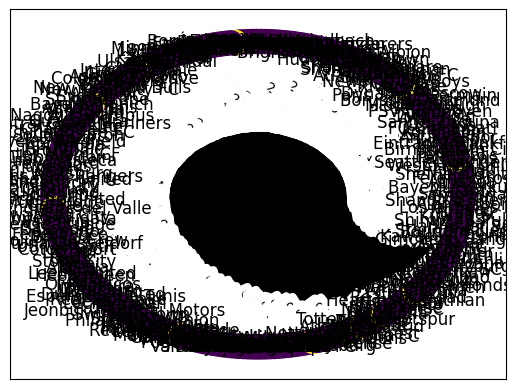

In [39]:
pos = nx.circular_layout(club_projected)

# draw nodes first
nx.draw_networkx_nodes(club_projected,pos,node_color = nx.get_node_attributes(club_projected,'winnerCountry').values())
# draw edges
nx.draw_networkx_edges(club_projected,pos,
                       width=list(nx.get_edge_attributes(club_projected,'weight').values()))

# draw node labels
nx.draw_networkx_labels(club_projected, pos)

nx.draw_networkx_edge_labels(club_projected,pos,label_pos=0.25,
                               edge_labels=nx.get_edge_attributes(club_projected,'weight'));

**Meaning of the edges**

In the club_projected network graph, an edge between two clubs means that they share at least one player in the dataset.

The weight of the edge represents the number of players they share, with higher weights meaning more players are shared between the two clubs.

# country

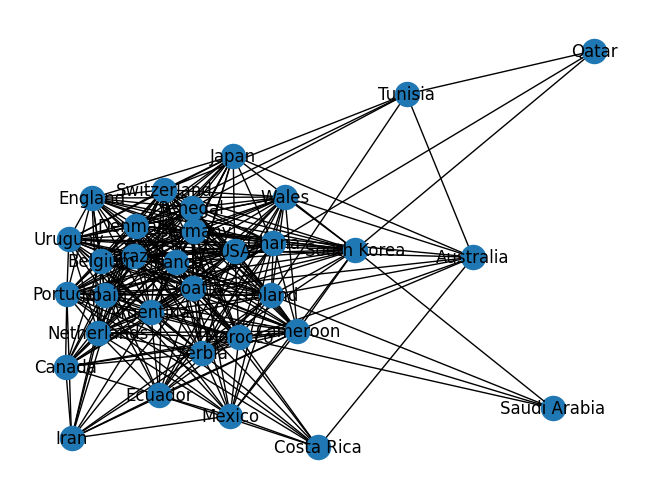

In [40]:
# project the graph onto the country nodes
country_projected = bipartite.weighted_projected_graph(fifanet2, country_nodes)
nx.draw(country_projected,with_labels=True)

## adding country attributes

In [41]:
# country attributes
attr_country=pd.read_excel(fifaLink,sheet_name='attributes_country')
attr_country

,country,developed
0,Argentina,0
1,Australia,1
2,Belgium,1
3,Brazil,0
4,Cameroon,0
5,Canada,1
6,Costa Rica,0
7,Croatia,0
8,Denmark,1
9,Ecuador,0


In [42]:
# dictionary for attributes
attrDic_country={n:s for n,s in zip(attr_country.country,attr_country.developed)}
nx.set_node_attributes(country_projected,attrDic_country , "developed")

In [49]:
# you can see them now:
# country_projected.nodes.data()

# country_projected.edges.data()

NodeDataView({'Mexico': {'bipartite': 1, 'developed': 0}, 'Iran': {'bipartite': 1, 'developed': 0}, 'Qatar': {'bipartite': 1, 'developed': 1}, 'Cameroon': {'bipartite': 1, 'developed': 0}, 'Uruguay': {'bipartite': 1, 'developed': 0}, 'Switzerland': {'bipartite': 1, 'developed': 1}, 'Spain': {'bipartite': 1, 'developed': 1}, 'Costa Rica': {'bipartite': 1, 'developed': 0}, 'Ecuador': {'bipartite': 1, 'developed': 0}, 'Croatia': {'bipartite': 1, 'developed': 0}, 'Canada': {'bipartite': 1, 'developed': 1}, 'Australia': {'bipartite': 1, 'developed': 1}, 'Tunisia': {'bipartite': 1, 'developed': 0}, 'Belgium': {'bipartite': 1, 'developed': 1}, 'USA': {'bipartite': 1, 'developed': 1}, 'Senegal': {'bipartite': 1, 'developed': 0}, 'France': {'bipartite': 1, 'developed': 1}, 'Germany': {'bipartite': 1, 'developed': 1}, 'England': {'bipartite': 1, 'developed': 1}, 'Poland': {'bipartite': 1, 'developed': 0}, 'Serbia': {'bipartite': 1, 'developed': 0}, 'South Korea': {'bipartite': 1, 'developed': 1}

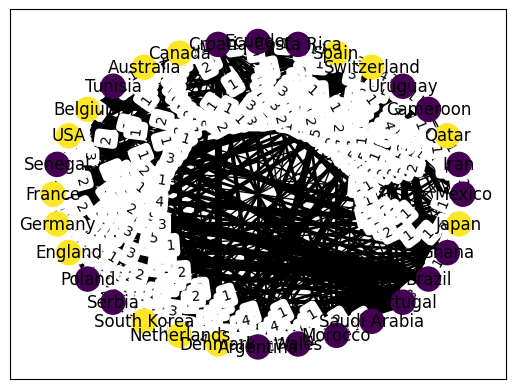

In [44]:
pos = nx.circular_layout(country_projected)

# draw nodes first
nx.draw_networkx_nodes(country_projected,pos,node_color = nx.get_node_attributes(country_projected,'developed').values())
# draw edges
nx.draw_networkx_edges(country_projected,pos,
                       width=list(nx.get_edge_attributes(country_projected,'weight').values()))
# draw node labels
nx.draw_networkx_labels(country_projected, pos)

nx.draw_networkx_edge_labels(country_projected,pos,label_pos=0.25,
                               edge_labels=nx.get_edge_attributes(country_projected,'weight'));

**Meaning of the edges**

In the country_projected network graph, an edge between two countries means that their clubs share at least one player in the dataset.

The weight of the edge represents the number of players (through clubs) they share. The higher the weight, the more players they share.

In [45]:
# Save graphs as graphml
club = nx.write_graphml(club_projected, "club_projected.graphml")
country = nx.write_graphml(country_projected, "country_projected.graphml")